In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
from PIL import Image
from scipy import ndimage as ndi

from skimage.morphology import watershed
import skimage
%matplotlib inline

In [3]:
mask = cv2.imread('data/stage1_train_/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masksmask.png', 0)
image = cv2.imread('data/stage1_train_/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png', 0)

In [4]:
imgs = os.listdir('data/stage1_test/')

In [6]:
def split_mask(step, image, save_folder):
    # path = "data/stage1_train_/{}/masksmask.png".format(image)
    path = "data/stage1_test/{}/images/{}.png".format(image, image)
    mask = cv2.imread(path)
    print(mask.shape)
    height, width, _ =  mask.shape
    matrices = []
    cnt_h = 0
    cnt_w = 0
    while (height > 0):
        if height > step:
            step_h = step
            b = (cnt_h+1)*step_h
            a = cnt_h*step_h
        else:
            step_h = step
            b = mask.shape[0]
            a = mask.shape[0]-step_h
#             print(a,b)
        width = mask.shape[1]
        cnt_w = 0
#         print(width)
        while (width > 0):
            zeros = np.zeros((step, step))
            if width > step:
                step_w = step
                zeros = mask[a:b, cnt_w*step_w:(cnt_w+1)*step_w]
#                 print(cnt_w*step_w, (cnt_w+1)*step_w)
#                 print(a, b)
            else:
                step_w = step
#                 print(step_w)
                zeros = mask[a:b, (mask.shape[1] - step_w):mask.shape[1]]
#                 print((mask.shape[1] - width), mask.shape[1])
#                 print(a, b)
            cnt_w += 1
#             print(cnt_w)
            matrices.append(zeros)
            cv2.imwrite('{}/{}_{}_{}.png'.format(save_folder, image, cnt_h, cnt_w), zeros)
            width = width - step_w
        cnt_h +=1
#         print('1')
        height = height - step_h
    print(len(matrices))
    # return matrices

In [77]:
m = split_mask(128, imgs[1], 'data/cropped_test/')

(390, 239, 3)
8


In [7]:
[split_mask(128, img, 'data/cropped_test/') for img in imgs]

(256, 256, 3)
4
(519, 253, 3)
10
(256, 256, 3)
4
(256, 256, 3)
4
(256, 256, 3)
4
(512, 680, 3)
24
(512, 640, 3)
20
(512, 680, 3)
24
(512, 640, 3)
20
(256, 256, 3)
4
(519, 162, 3)
10
(512, 640, 3)
20
(524, 348, 3)
15
(256, 256, 3)
4
(512, 680, 3)
24
(256, 256, 3)
4
(256, 256, 3)
4
(519, 253, 3)
10
(256, 256, 3)
4
(524, 348, 3)
15
(520, 348, 3)
15
(260, 347, 3)
9
(512, 680, 3)
24
(256, 256, 3)
4
(512, 680, 3)
24
(256, 256, 3)
4
(390, 239, 3)
8
(512, 640, 3)
20
(256, 256, 3)
4
(256, 256, 3)
4
(260, 347, 3)
9
(256, 256, 3)
4
(520, 348, 3)
15
(512, 640, 3)
20
(256, 256, 3)
4
(256, 256, 3)
4
(260, 347, 3)
9
(520, 348, 3)
15
(512, 640, 3)
20
(256, 256, 3)
4
(512, 640, 3)
20
(520, 696, 3)
30
(256, 256, 3)
4
(512, 640, 3)
20
(512, 680, 3)
24
(519, 253, 3)
10
(519, 161, 3)
10
(256, 256, 3)
4
(520, 696, 3)
30
(524, 348, 3)
15
(520, 696, 3)
30
(524, 348, 3)
15
(519, 161, 3)
10
(519, 162, 3)
10
(520, 348, 3)
15
(256, 256, 3)
4
(512, 680, 3)
24
(256, 256, 3)
4
(260, 347, 3)
9
(256, 256, 3)
4
(519, 2

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [59]:
out = os.listdir('output/mask')

In [55]:
outs_.shape

AttributeError: 'list' object has no attribute 'shape'

In [48]:
y = np.hstack(y)

In [50]:
y.reshape(4, len(outs_))

ValueError: cannot reshape array of size 9745 into shape (4,2437)

In [57]:
y=np.array([np.array(xi) for xi in outs_])

In [58]:
for i in y:
    if i.shape != 4:
        print(i)

['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '0'
 '1' '0']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '0'
 '1' '1']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '0'
 '1' '2']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '0'
 '2' '0']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '0'
 '2' '1']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '0'
 '2' '2']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '1'
 '1' '0']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '1'
 '1' '1']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '1'
 '1' '2']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '1'
 '2' '0']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '1'
 '2' '1']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '1'
 '2' '2']
['0999dab07b11bc

 '2' '1']
['1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c' '3'
 '2' '2']
['1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c' '3'
 '3' '0']
['1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c' '3'
 '3' '1']
['1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c' '3'
 '3' '2']
['1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c' '3'
 '4' '0']
['1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c' '3'
 '4' '1']
['1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c' '3'
 '4' '2']
['1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c' '3'
 '5' '0']
['1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c' '3'
 '5' '1']
['1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c' '3'
 '5' '2']
['17b9bf4356db24967c4677b8376ac38f826de73a88b93a8d73a8b452e399cdff' '0'
 '1' '0']
['17b9bf4356db24967c4677b8376ac38f826de73a88b93a8d73a8b452e399cdff' '0'
 '1' '1']
['17b9

 '1' '2']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '2' '0']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '2' '1']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '2' '2']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '3' '0']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '3' '1']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '3' '2']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '4' '0']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '4' '1']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '4' '2']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '5' '0']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '5' '1']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '5' '2']
['1879

 '1' '0']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '1' '1']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '1' '2']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '2' '0']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '2' '1']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '2' '2']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '3' '0']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '3' '1']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '3' '2']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '4' '0']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '4' '1']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '4' '2']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '5' '0']
['1cdb

 '2' '1']
['1ef68e93964c2d9230100c1347c328f6385a7bc027879dc3d4c055e6fe80cb3c' '1'
 '2' '2']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '1' '0']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '1' '1']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '1' '2']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '2' '0']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '2' '1']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '2' '2']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '3' '0']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '3' '1']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '3' '2']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '4' '0']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '4' '1']
['259b

 '1' '2']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '0'
 '2' '0']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '0'
 '2' '1']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '0'
 '2' '2']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '1'
 '1' '0']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '1'
 '1' '1']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '1'
 '1' '2']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '1'
 '2' '0']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '1'
 '2' '1']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '1'
 '2' '2']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '2'
 '1' '0']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '2'
 '1' '1']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '2'
 '1' '2']
['336d

 '3' '0']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '1'
 '3' '1']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '1'
 '3' '2']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '2'
 '1' '0']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '2'
 '1' '1']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '2'
 '1' '2']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '2'
 '2' '0']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '2'
 '2' '1']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '2'
 '2' '2']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '2'
 '3' '0']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '2'
 '3' '1']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '2'
 '3' '2']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '3'
 '1' '0']
['432f

 '3' '1']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '2'
 '3' '2']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '2'
 '4' '0']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '2'
 '4' '1']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '2'
 '4' '2']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '2'
 '5' '0']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '2'
 '5' '1']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '2'
 '5' '2']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '2'
 '6' '0']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '2'
 '6' '1']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '2'
 '6' '2']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '3'
 '1' '0']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '3'
 '1' '1']
['44af

 '2' '2']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '3' '0']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '3' '1']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '3' '2']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '4' '0']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '4' '1']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '4' '2']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '5' '0']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '5' '1']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '5' '2']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '6' '0']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '6' '1']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '6' '2']
['4be7

 '3' '0']
['505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81' '3'
 '3' '1']
['505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81' '3'
 '3' '2']
['505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81' '3'
 '4' '0']
['505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81' '3'
 '4' '1']
['505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81' '3'
 '4' '2']
['505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81' '3'
 '5' '0']
['505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81' '3'
 '5' '1']
['505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81' '3'
 '5' '2']
['519dc0d672d1c295fc69b629af8721ccb1a1f136d1976685a68487e62547ffe0' '0'
 '1' '0']
['519dc0d672d1c295fc69b629af8721ccb1a1f136d1976685a68487e62547ffe0' '0'
 '1' '1']
['519dc0d672d1c295fc69b629af8721ccb1a1f136d1976685a68487e62547ffe0' '0'
 '1' '2']
['519dc0d672d1c295fc69b629af8721ccb1a1f136d1976685a68487e62547ffe0' '0'
 '2' '0']
['519d

 '1' '1']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '3'
 '1' '2']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '3'
 '2' '0']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '3'
 '2' '1']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '3'
 '2' '2']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '3'
 '3' '0']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '3'
 '3' '1']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '3'
 '3' '2']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '4'
 '1' '0']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '4'
 '1' '1']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '4'
 '1' '2']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '4'
 '2' '0']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '4'
 '2' '1']
['5504

 '2' '2']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '0'
 '1' '0']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '0'
 '1' '1']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '0'
 '1' '2']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '0'
 '2' '0']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '0'
 '2' '1']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '0'
 '2' '2']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '0'
 '3' '0']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '0'
 '3' '1']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '0'
 '3' '2']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '1'
 '1' '0']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '1'
 '1' '1']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '1'
 '1' '2']
['699f

 '5' '0']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '1'
 '5' '1']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '1'
 '5' '2']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '2'
 '1' '0']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '2'
 '1' '1']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '2'
 '1' '2']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '2'
 '2' '0']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '2'
 '2' '1']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '2'
 '2' '2']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '2'
 '3' '0']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '2'
 '3' '1']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '2'
 '3' '2']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '2'
 '4' '0']
['7bdb

 '4' '1']
['8922a6ac8fd0258ec27738ca101867169b20d90a60fc84f93df77acd5bf7c80b' '3'
 '4' '2']
['8922a6ac8fd0258ec27738ca101867169b20d90a60fc84f93df77acd5bf7c80b' '3'
 '5' '0']
['8922a6ac8fd0258ec27738ca101867169b20d90a60fc84f93df77acd5bf7c80b' '3'
 '5' '1']
['8922a6ac8fd0258ec27738ca101867169b20d90a60fc84f93df77acd5bf7c80b' '3'
 '5' '2']
['8b59819fbc92eefe45b1db95c0cc3a467ddcfc755684c7f2ba2f6ccb9ad740ab' '0'
 '1' '0']
['8b59819fbc92eefe45b1db95c0cc3a467ddcfc755684c7f2ba2f6ccb9ad740ab' '0'
 '1' '1']
['8b59819fbc92eefe45b1db95c0cc3a467ddcfc755684c7f2ba2f6ccb9ad740ab' '0'
 '1' '2']
['8b59819fbc92eefe45b1db95c0cc3a467ddcfc755684c7f2ba2f6ccb9ad740ab' '0'
 '2' '0']
['8b59819fbc92eefe45b1db95c0cc3a467ddcfc755684c7f2ba2f6ccb9ad740ab' '0'
 '2' '1']
['8b59819fbc92eefe45b1db95c0cc3a467ddcfc755684c7f2ba2f6ccb9ad740ab' '0'
 '2' '2']
['8b59819fbc92eefe45b1db95c0cc3a467ddcfc755684c7f2ba2f6ccb9ad740ab' '0'
 '3' '0']
['8b59819fbc92eefe45b1db95c0cc3a467ddcfc755684c7f2ba2f6ccb9ad740ab' '0'
 '3' '1']
['8b59

 '2' '2']
['912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea7e460241a23535a406' '1'
 '1' '0']
['912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea7e460241a23535a406' '1'
 '1' '1']
['912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea7e460241a23535a406' '1'
 '1' '2']
['912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea7e460241a23535a406' '1'
 '2' '0']
['912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea7e460241a23535a406' '1'
 '2' '1']
['912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea7e460241a23535a406' '1'
 '2' '2']
['9ab2d381f90b485a68b82bc07f94397a0373e3215ad20935a958738e55f3cfc2' '0'
 '1' '0']
['9ab2d381f90b485a68b82bc07f94397a0373e3215ad20935a958738e55f3cfc2' '0'
 '1' '1']
['9ab2d381f90b485a68b82bc07f94397a0373e3215ad20935a958738e55f3cfc2' '0'
 '1' '2']
['9ab2d381f90b485a68b82bc07f94397a0373e3215ad20935a958738e55f3cfc2' '0'
 '2' '0']
['9ab2d381f90b485a68b82bc07f94397a0373e3215ad20935a958738e55f3cfc2' '0'
 '2' '1']
['9ab2d381f90b485a68b82bc07f94397a0373e3215ad20935a958738e55f3cfc2' '0'
 '2' '2']
['9ab2

 '6' '0']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '1'
 '6' '1']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '1'
 '6' '2']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '2'
 '1' '0']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '2'
 '1' '1']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '2'
 '1' '2']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '2'
 '2' '0']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '2'
 '2' '1']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '2'
 '2' '2']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '2'
 '3' '0']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '2'
 '3' '1']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '2'
 '3' '2']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '2'
 '4' '0']
['9f17

 '1' '1']
['ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8' '0'
 '1' '2']
['ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8' '0'
 '2' '0']
['ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8' '0'
 '2' '1']
['ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8' '0'
 '2' '2']
['ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8' '1'
 '1' '0']
['ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8' '1'
 '1' '1']
['ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8' '1'
 '1' '2']
['ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8' '1'
 '2' '0']
['ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8' '1'
 '2' '1']
['ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8' '1'
 '2' '2']
['ade080c6618cbbb0a25680cf847f312b5e19b22bfe1cafec0436987ebe5b1e7e' '0'
 '1' '0']
['ade080c6618cbbb0a25680cf847f312b5e19b22bfe1cafec0436987ebe5b1e7e' '0'
 '1' '1']
['ade0

 '6' '2']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '0'
 '1' '0']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '0'
 '1' '1']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '0'
 '1' '2']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '0'
 '2' '0']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '0'
 '2' '1']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '0'
 '2' '2']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '0'
 '3' '0']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '0'
 '3' '1']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '0'
 '3' '2']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '1'
 '1' '0']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '1'
 '1' '1']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '1'
 '1' '2']
['b83d

 '1' '0']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '1' '1']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '1' '2']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '2' '0']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '2' '1']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '2' '2']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '3' '0']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '3' '1']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '3' '2']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '4' '0']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '4' '1']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '4' '2']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '5' '0']
['bdc7

 '1' '1']
['ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef' '3'
 '1' '2']
['ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef' '3'
 '2' '0']
['ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef' '3'
 '2' '1']
['ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef' '3'
 '2' '2']
['ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef' '4'
 '1' '0']
['ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef' '4'
 '1' '1']
['ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef' '4'
 '1' '2']
['ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef' '4'
 '2' '0']
['ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef' '4'
 '2' '1']
['ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef' '4'
 '2' '2']
['d616d323a9eeb9da1b66f8d5df671d63c092c9919cb2c0b223e29c63257c944d' '0'
 '1' '0']
['d616d323a9eeb9da1b66f8d5df671d63c092c9919cb2c0b223e29c63257c944d' '0'
 '1' '1']
['d616

 '1' '2']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '2' '0']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '2' '1']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '2' '2']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '3' '0']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '3' '1']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '3' '2']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '4' '0']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '4' '1']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '4' '2']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '5' '0']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '5' '1']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '5' '2']
['da6c

 '1' '0']
['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8' '2'
 '1' '1']
['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8' '2'
 '1' '2']
['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8' '2'
 '2' '0']
['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8' '2'
 '2' '1']
['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8' '2'
 '2' '2']
['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8' '2'
 '3' '0']
['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8' '2'
 '3' '1']
['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8' '2'
 '3' '2']
['e17b7aedd251a016c01ef9158e6e4aa940d9f1b35942d86028dc1222192a9258' '0'
 '1' '0']
['e17b7aedd251a016c01ef9158e6e4aa940d9f1b35942d86028dc1222192a9258' '0'
 '1' '1']
['e17b7aedd251a016c01ef9158e6e4aa940d9f1b35942d86028dc1222192a9258' '0'
 '1' '2']
['e17b7aedd251a016c01ef9158e6e4aa940d9f1b35942d86028dc1222192a9258' '0'
 '2' '0']
['e17b

 '5' '1']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '2'
 '5' '2']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '2'
 '6' '0']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '2'
 '6' '1']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '2'
 '6' '2']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '3'
 '1' '0']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '3'
 '1' '1']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '3'
 '1' '2']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '3'
 '2' '0']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '3'
 '2' '1']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '3'
 '2' '2']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '3'
 '3' '0']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '3'
 '3' '1']
['f0d0

 '2' '2']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '3' '0']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '3' '1']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '3' '2']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '4' '0']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '4' '1']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '4' '2']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '5' '0']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '5' '1']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '5' '2']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '6' '0']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '6' '1']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '6' '2']
['fac5

In [37]:
np.array(outs_)

array([list(['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5', '0', '1', '0']),
       list(['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5', '0', '1', '1']),
       list(['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5', '0', '1', '2']),
       ...,
       list(['fe9adb627a6f45747c5a8223b671774791ededf9364f6544be487c540107fa4f', '1', '2', '1']),
       list(['fe9adb627a6f45747c5a8223b671774791ededf9364f6544be487c540107fa4f', '1', '2', '2']),
       list(['Thumbs'])], dtype=object)

In [60]:
outs = [i.split('.', 1)[0] for i in out]
outs_ = [i.split('_', 3) for i in outs]
np_out = np.array([i.split('_', 3) for i in outs])

np_out[(np_out[:, 0] == 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8') & (np_out[:, -1] == '0')]

array([['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '0', '1', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '0', '2', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '0', '3', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '1', '1', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '1', '2', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '1', '3', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '2', '1', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '2', '2', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '2', '3', '0']], dtype='<U64')

In [51]:
outs = [i.split('.', 1)[0] for i in out]
outs_ = [i.split('_', 3)[0] for i in outs]
indxs = [i for i, j in enumerate(outs_) if j == 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8']

In [107]:
indxs = [i for i, j in enumerate(outs_) if j == 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8']

In [113]:
lol = [outs[i] for i in indxs]

In [115]:
xc = [i.split('_', 3)[-1] for i in lol]

In [119]:
zero_st = [i for i, j in enumerate(xc) if j == '0']

In [123]:
stuff = [lol[i] for i in zero_st]

In [124]:
sorted(stuff)

['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_0_1_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_0_2_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_0_3_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_1_1_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_1_2_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_1_3_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_2_1_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_2_2_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_2_3_0']

In [ ]:
def get_sorted_names(crop_folder):
    crops = os.listdir(crop_folder)
    crops = [i.split('.', 1)[0] for i in crops]
    crops.sort(key = lambda x: int(x.rsplit('_',1)[1]))
    return [crop + '.tif' for crop in crops]

In [73]:
import operator

def get_sorted_names(name, file_list, ch):
    outs = [i.split('.', 1)[0] for i in file_list]
    np_out = np.array([i.split('_', 3) for i in outs])
    # print(np_out)
    zero_st = [(np_out[:, 0] == name) & (np_out[:, -1] == ch)]
    stuff = np.array(file_list)[zero_st]
    s = [i.split('_') for i in stuff]
    # s.sort(key = operator.itemgetter(1, 2))
    s = sorted(s, key = lambda x: (int(x[1]), int(x[2])))
    s = ['_'.join(i) for i in s]
    return s

In [74]:
def join_mask(step, image, crop_folder, save_folder, ch):
    # path = "data/stage1_train_/{}/masksmask.png".format(image)
    out = os.listdir(crop_folder)
    path = "data/stage1_test/{}/images/{}.png".format(image, image)
    crops = get_sorted_names(image, out, ch)
    mask = cv2.imread(path)
    height, width, _ =  mask.shape
    matrices = []
    zeros = np.zeros((height, width))
    cnt = 0
    cnt_h = 0
    cnt_w = 0
    while (height > 0):
        if height > step:
            step_h = step
            b = (cnt_h+1)*step_h
            a = cnt_h*step_h
        else:
            step_h = step
            b = mask.shape[0]
            a = mask.shape[0]-step_h
        width = mask.shape[1]
        cnt_w = 0
        while (width > 0):
            
            if width > step:
                step_w = step
                read_path = os.path.join(crop_folder, crops[cnt])
                zeros[a:b,cnt_w*step_w:(cnt_w+1)*step_w] = cv2.imread(read_path, 0)
                
            else:
                step_w = step
                read_path = os.path.join(crop_folder, crops[cnt])
                zeros[a:b,(mask.shape[1] - step_w):mask.shape[1]] = cv2.imread(read_path, 0)
            cnt_w += 1
            cnt += 1
            matrices.append(zeros)
            
            width = width - step_w
        cnt_h +=1
        height = height - step_h
    cv2.imwrite('{}/{}_{}.png'.format(save_folder, image, ch), zeros)

In [75]:
join_mask(128, 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
          'output/mask/', 'output/joined_mask/', '0')

In [79]:
[join_mask(128, img, 'output/mask/', 'output/joined_mask/', '0') for img in imgs]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

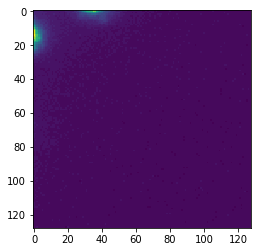

In [40]:
plt.imshow(mat[0])

In [26]:
crop('data/cropped_test',
     'data/stage1_test/0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5/images/0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5.png',
     128, 128)

1
ex
ex
ex
ex


In [13]:
res = cv2.resize(image, (128, 128), cv2.INTER_CUBIC)

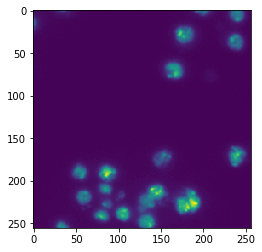

In [14]:
plt.imshow(image)

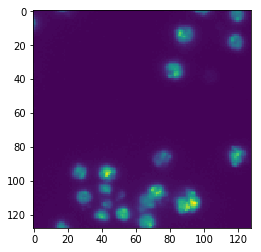

In [15]:
plt.imshow(res)

In [3]:
mask.shape

(256, 256)

In [28]:
test = np.zeros([4,3,128,128])
test[:,0,:,:].shape

(4, 128, 128)

In [6]:
mask1.shape

(3, 256, 256)

In [5]:
mask1 = np.zeros((3, *mask.shape))

In [23]:
#mask1 = np.zeros(3, (*mask.shape))
kernel = np.ones((4, 4), np.uint8)
seed = cv2.erode(mask[:,:,0], kernel, iterations=1)
border = mask[:,:,0] - seed
mask[:,:,1] = np.zeros(seed.shape)
mask[:,:,1] = seed
mask[:,:,2] = np.zeros(seed.shape)
mask[:,:,2] = border

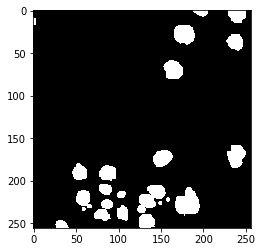

In [26]:
plt.imshow(mask[:,:,0], 'gray')

In [63]:
train_path = 'data/stage1_train/'

In [30]:
masks_path = 'data/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks'

In [87]:
files = os.listdir(train_path)
kernel = np.ones((3,3),np.uint8)
for i in tqdm(range(len(files))):
    masks = os.path.join(files[i], 'masks')
    img_path = os.path.join(train_path, masks)
    mask = unite(img_path)
    seed = cv2.erode(mask, kernel,iterations = 1)
    border = mask - seed
    cv2.imwrite(img_path + 'mask.png', mask)
    cv2.imwrite(img_path + 'seed.png', seed)
    cv2.imwrite(img_path + 'border.png', border)


100%|██████████| 664/664 [00:43<00:00, 15.20it/s]


In [86]:
def unite(masks_path):
    one_true = None
    for image in os.listdir(masks_path):
        img_path = os.path.join(masks_path, image)
        img_mask = cv2.imread(img_path)
        if not hasattr(one_true, 'shape'):
            one_true = img_mask
            # print(img_path)
        else:
            one_true = one_true + img_mask
    return one_true

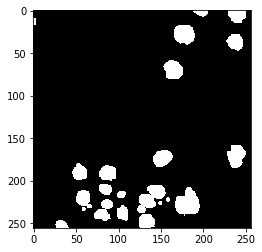

In [62]:
plt.imshow(one_true)

In [50]:
img = cv2.imread('data/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks/07a9bf1d7594af2763c86e93f05d22c4d5181353c6d3ab30a345b908ffe5aadc.png')

In [51]:
img.shape

(256, 256, 3)

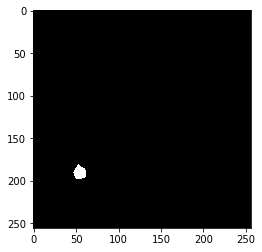

In [52]:
kernel = np.ones((3,3),np.uint8)
eroison = cv2.erode(img, kernel,iterations = 1)
border = img - eroison
plt.imshow(eroison)

(256, 256, 3)


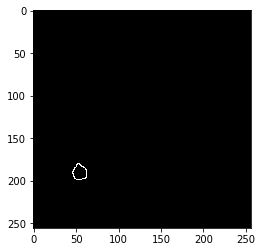

In [54]:
plt.imshow(border)
print(border.shape)

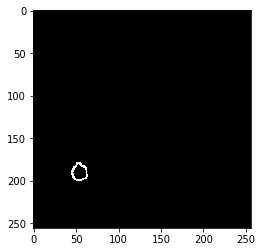

In [14]:
kernel = np.ones((3,3),np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient)

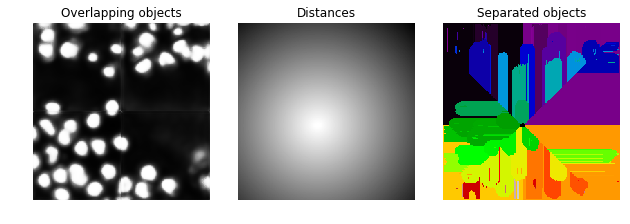

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
image = full_mask
distance = ndi.distance_transform_edt(full_mask)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=seed)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

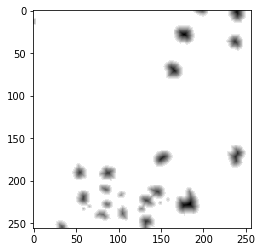

In [21]:
plt.imshow(-distance, 'gray')

In [6]:
name = '0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732'
full_mask = cv2.imread('output/joined_mask/{}_0.png'.format(name), 0)
seed = cv2.imread('output/seed/{}_1.png'.format(name), 0)
border = cv2.imread('output/border/{}_2.png'.format(name), 0)

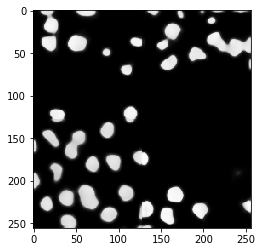

In [7]:
plt.imshow(border, 'gray')

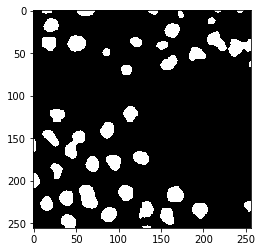

In [183]:
th = 230
full_mask[full_mask>=th] = 255
full_mask[full_mask<th] = 0
plt.imshow(full_mask, 'gray')

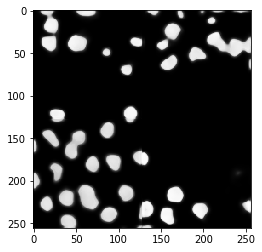

In [184]:
seed_ = border - seed
plt.imshow(seed_, 'gray')

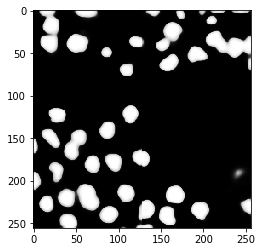

In [152]:
plt.imshow(seed, 'gray')

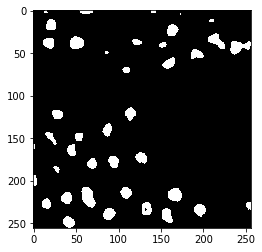

In [167]:
seed[seed<250] = 0
plt.imshow(seed, 'gray')

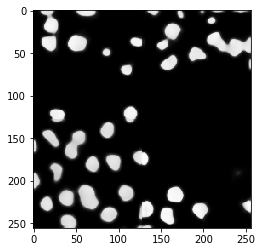

In [151]:
plt.imshow(border, 'gray')

In [190]:
def calc_watershed(name, th=130):
    print(name)
    full_mask = cv2.imread('output/joined_mask/{}_0.png'.format(name), 0)
    seed = cv2.imread('output/seed/{}_1.png'.format(name), 0)
    border = cv2.imread('output/border/{}_2.png'.format(name), 0)
    print(border.shape, seed.shape, full_mask.shape)
#     full_mask = mask[0]
#     seed = mask[1]
#     border = mask[2]
    full_mask[full_mask < th] = 0
    seed[seed < th] = 0
    border[border < th] = 0
    distance = ndi.distance_transform_edt(full_mask)
    # local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
    #                             labels=image)
    # seed = seed - border
    ret, markers = cv2.connectedComponents(seed.astype(np.int8))
    # markers = ndi.label(local_maxi)[0]
    labels = watershed(-distance, markers, mask=full_mask)
    cv2.imwrite('output/submission_mask/{}.png'.format(name), labels)
    # return labels, distance

In [191]:
labels, distance = calc_watershed('0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732')

0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732
(256, 256) (256, 256) (256, 256)


TypeError: 'NoneType' object is not iterable

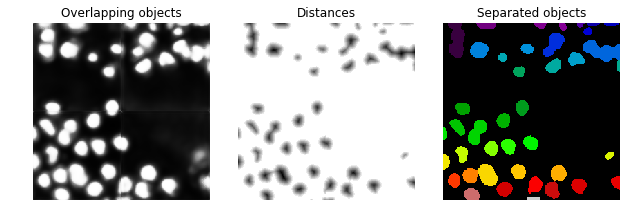

In [192]:
image = cv2.imread('data/stage1_test/0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732/images/0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732.png')
fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(full_mask, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

In [193]:
[calc_watershed(img, 60) for img in imgs]

0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5
(256, 256) (256, 256) (256, 256)
0999dab07b11bc85fb8464fc36c947fbd8b5d6ec49817361cb780659ca805eac
(519, 253) (519, 253) (519, 253)
0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732
(256, 256) (256, 256) (256, 256)
0e132f71c8b4875c3c2dd7a22997468a3e842b46aa9bd47cf7b0e8b7d63f0925
(256, 256) (256, 256) (256, 256)
0ed3555a4bd48046d3b63d8baf03a5aa97e523aa483aaa07459e7afa39fb96c6
(256, 256) (256, 256) (256, 256)
0f1f896d9ae5a04752d3239c690402c022db4d72c0d2c087d73380896f72c466
(512, 680) (512, 680) (512, 680)
1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c
(512, 640) (512, 640) (512, 640)
17b9bf4356db24967c4677b8376ac38f826de73a88b93a8d73a8b452e399cdff
(512, 680) (512, 680) (512, 680)
1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b
(512, 640) (512, 640) (512, 640)
191b2b2205f2f5cc9da04702c5d422bc249faf8bca1107af792da63cccfba829
(256, 256) (256, 256) (256, 256)
1962d0c5faf3e85cda80

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [19]:
labels.shape

(256, 256)

In [21]:
full_mask.shape

(256, 256)

In [130]:
lab.max()

30

In [87]:
import numpy as np
import skimage.morphology
import cv2
import pandas as pd

def rle_of_binary(x):
    """ Run length encoding of a binary 2D array. """
    dots = np.where(x.T.flatten() == 1)[0] # indices from top to down
    run_lengths = []
    prev = -2
    for b in dots:
        if ( b > prev +1): run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

def mask_to_rle(mask, cutoff=.5, min_object_size=1.):
    """ Return run length encoding of mask. """
    # segment image and label different objects
#     lab_mask = skimage.morphology.label(mask > cutoff)

#     # Keep only objects that are large enough.
#     (mask_labels, mask_sizes) = np.unique(lab_mask, return_counts=True)
#     if (mask_sizes < min_object_size).any():
#         mask_labels = mask_labels[mask_sizes < min_object_size]
#         for n in mask_labels:
#             lab_mask[lab_mask == n] = 0
#         lab_mask = skimage.morphology.label(lab_mask > cutoff)

        # Loop over each object excluding the background labeled by 0.
    for i in range(1, mask.max() + 1):
        yield rle_of_binary(mask == i)


In [194]:
test_df = pd.read_csv('data/stage1_sample_submission.csv')
    # Run length encoding of predicted test masks.
test_pred_rle = []
test_pred_ids = []

In [195]:

for n, id_ in enumerate(test_df['ImageId']):
    # min_object_size = 20*test_df.loc[n,'img_height']*test_df.loc[n,'img_width']/(256*256)
    mask = cv2.imread('output/submission_mask/{}.png'.format(id_), 0)
#     print(id_)
    rle = list(mask_to_rle(mask))
    test_pred_rle.extend(rle)
    test_pred_ids.extend([id_]*len(rle))

print('test_pred_ids.shape = {}'.format(np.array(test_pred_ids).shape))
print('test_pred_rle.shape = {}'.format(np.array(test_pred_rle).shape))

#  Create submission file
sub = pd.DataFrame()
sub['ImageId'] = test_pred_ids
sub['EncodedPixels'] = pd.Series(test_pred_rle).apply(lambda x: ' '.join(str(y) for y in x))
sub.to_csv('sub-dsbowl2018-3.csv', index=False)
sub.head()

test_pred_ids.shape = (6503,)
test_pred_rle.shape = (6503,)


,ImageId,EncodedPixels
0,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,3841 1 4097 1 4353 1 4609 1 4865 1 5121 1 5377...
1,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,14882 9 15134 16 15387 21 15641 25 15896 27 16...
2,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,44595 4 44847 11 45101 14 45356 16 45612 16 45...
3,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,26449 3 26703 7 26957 14 27212 17 27467 19 277...
4,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,49768 6 50022 10 50276 13 50531 15 50786 17 51...
